# Demographics/Migration

## Notebook Links:
[Home](index.ipynb)

[Resale Market](resales.ipynb)

[Construction/Starts](starts.ipynb)

[Rental Market](rental.ipynb)

[Economic Drivers](economics.ipynb)

[Demograhics/Migration](demographics.ipynb)

## HTML Links:
[Home](index.html)

[Resale Market](resales.html)

[Construction/Starts](starts.html)

[Rental Market](rental.html)

[Economic Drivers](economics.html)

[Demograhics/Migration](demographics.html)

17-10-0135-01 - pop estimates

In [2]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Arial')

C:\Users\Maln\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
sc = StatsCan()
sc.update_tables()
pop_est = sc.table_to_df("17-10-0135-01")
#df = sc.table_to_df("17-10-0136-01")

c:\Users\Maln\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


c:\Users\Maln\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
17100135-eng.zip: 100%|██████████| 15.6M/15.6M [00:05<00:00, 2.82MB/s]


## Population

In [4]:
cal_pop_est = pop_est[pop_est['GEO']=="Calgary (CMA), Alberta"]
cal_pop_est = cal_pop_est.filter(items = ['REF_DATE','Sex','Age group', 'VALUE'])
cal_pop_est_all = cal_pop_est[(cal_pop_est['Sex']=='Both sexes') & (cal_pop_est['Age group'] == 'All ages')]
cal_pop_est_all=cal_pop_est_all.set_index('REF_DATE')

In [5]:
cal_pop_est_all['pop_change']= cal_pop_est_all['VALUE'].pct_change(1)*100

c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


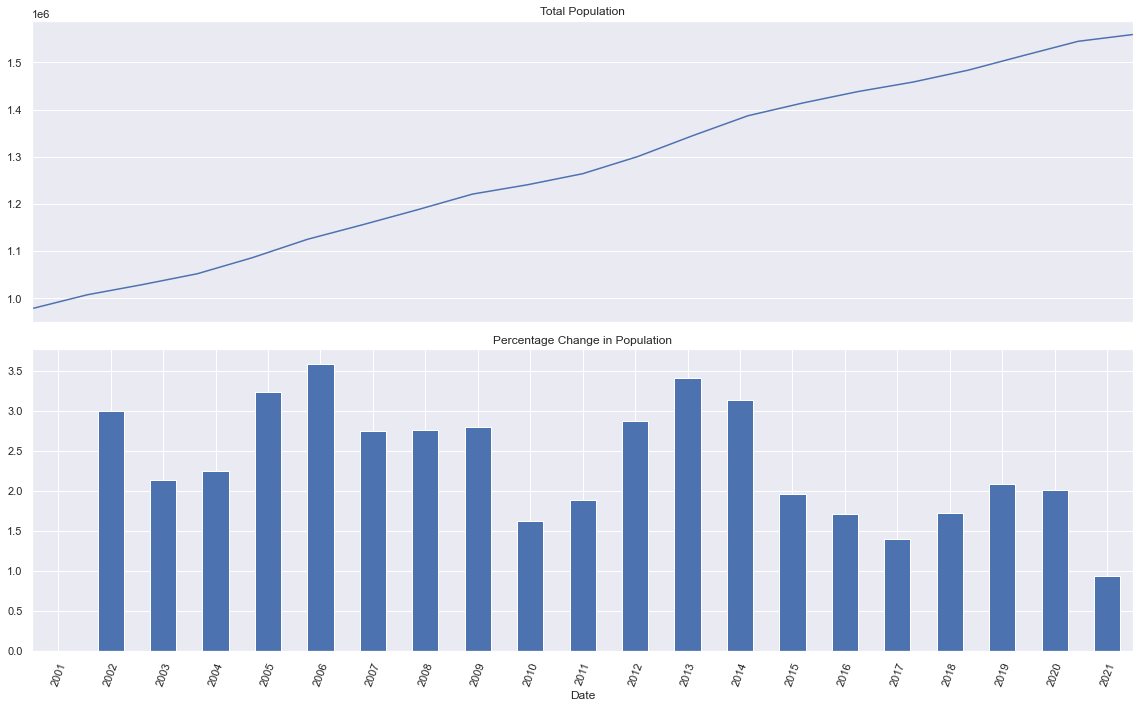

In [6]:
fig, ax = plt.subplots(nrows=2,figsize=(16,10))

cal_pop_est_all[['VALUE']].plot(ax=ax[0],title='Total Population', legend=False, xlabel='')

cal_pop_est_all['pop_change'].plot(ax=ax[1],title='Percentage Change in Population', kind='bar',xlabel='Date')

ax[0].set_xticklabels(labels=cal_pop_est_all.index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")
ax[0].get_xaxis().set_visible(False)
ax[1].set_xticklabels(labels=cal_pop_est_all.index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")


plt.tight_layout()
plt.savefig('kbase_graphs/cal_population.png')


Calgary's population has increased from 1 million to over 1.5 million in the past 20 years. Most of this population growth is correlated with job and economic growth - reflecting demand of economic migrants. In recent years this population growth has slowed down, in line with expectations of local industry.

## Migration

In [7]:
world_mig = sc.table_to_df('17-10-0040-01')
prov_mig = sc.table_to_df('17-10-0020-01')
nat_pop = sc.table_to_df('17-10-0059-01')
sc.update_tables()


c:\Users\Maln\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
17100040-eng.zip: 100%|██████████| 102k/102k [00:00<00:00, 20.5MB/s]


17100020-eng.zip: 100%|██████████| 46.0k/46.0k [00:00<00:00, 9.20MB/s]


17100059-eng.zip: 100%|██████████| 75.9k/75.9k [00:00<00:00, 360kB/s]


[]

In [8]:
prov_mig_orig = sc.table_to_df('17-10-0045-01')

17100045-eng.zip: 100%|██████████| 200k/200k [00:01<00:00, 192kB/s] 


In [31]:
prov_mig_pivot = prov_mig_orig.filter(['REF_DATE','GEO','Geography, province of destination','VALUE']).pivot(index='REF_DATE',columns=['Geography, province of destination','GEO'],values='VALUE')['Alberta, province of destination']

In [32]:
prov_mig_pivot

GEO,"Newfoundland and Labrador, province of origin","Prince Edward Island, province of origin","Nova Scotia, province of origin","New Brunswick, province of origin","Quebec, province of origin","Ontario, province of origin","Manitoba, province of origin","Saskatchewan, province of origin","British Columbia, province of origin","Yukon, province of origin","Northwest Territories including Nunavut, province of origin","Northwest Territories, province of origin","Nunavut, province of origin"
REF_DATE,,,,,,,,,,,,,
1971-07-01,87.0,102.0,518.0,328.0,821.0,4444.0,2562.0,5586.0,6362.0,242.0,378.0,NaN,NaN
1971-10-01,108.0,73.0,370.0,257.0,826.0,3131.0,1844.0,4426.0,4939.0,182.0,282.0,NaN,NaN
1972-01-01,74.0,41.0,308.0,164.0,538.0,2362.0,1456.0,3268.0,3797.0,185.0,291.0,NaN,NaN
1972-04-01,54.0,43.0,197.0,169.0,550.0,1849.0,1204.0,2599.0,3917.0,155.0,242.0,NaN,NaN
1972-07-01,95.0,66.0,408.0,257.0,864.0,3745.0,2410.0,5300.0,5890.0,222.0,349.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,204.0,45.0,252.0,242.0,349.0,2710.0,827.0,1369.0,2516.0,61.0,NaN,84.0,0.0
2021-01-01,440.0,120.0,503.0,323.0,584.0,4745.0,1455.0,2639.0,4157.0,15.0,NaN,229.0,31.0
2021-04-01,511.0,63.0,677.0,504.0,960.0,7610.0,2072.0,3341.0,7462.0,71.0,NaN,286.0,82.0


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

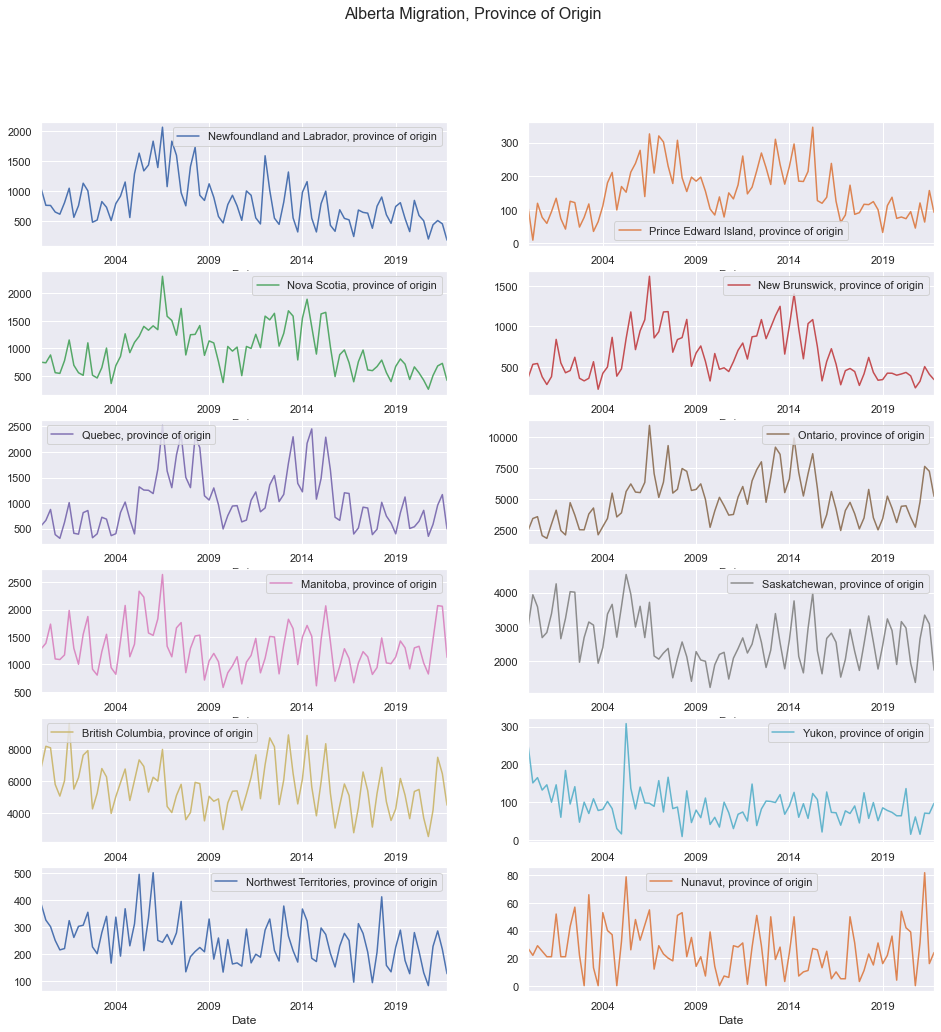

In [35]:
fig, ax = plt.subplots(nrows=6,ncols=2,figsize=(16,16))
fig.suptitle('Alberta Migration, Provinces of Origin', fontsize=16)

prov_mig_pivot[['Newfoundland and Labrador, province of origin',
                  'Prince Edward Island, province of origin',
                  'Nova Scotia, province of origin',
                  'New Brunswick, province of origin',
                  'Quebec, province of origin', 'Ontario, province of origin',
                  'Manitoba, province of origin',
                  'Saskatchewan, province of origin',
                  'British Columbia, province of origin',
                  'Yukon, province of origin',
                  'Northwest Territories, province of origin',
                  'Nunavut, province of origin']]['2000':].plot(subplots=True,xlabel='Date',ax=ax)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

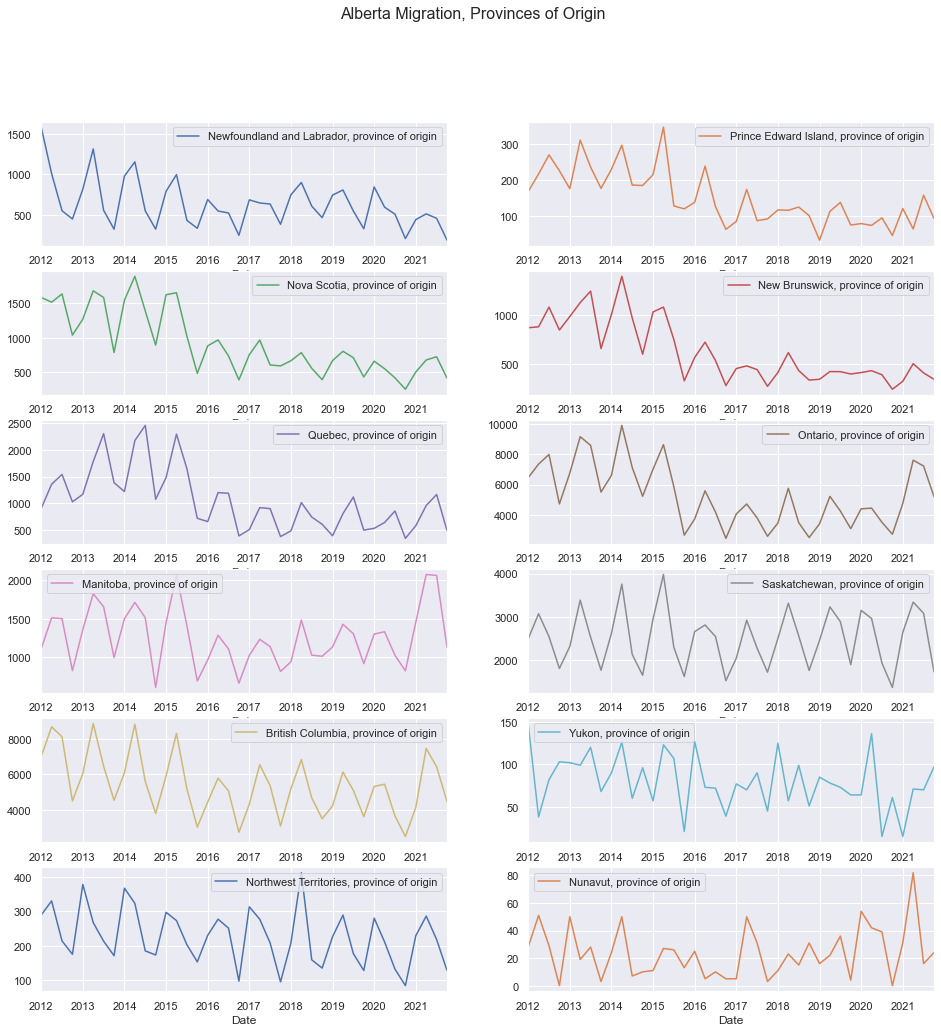

In [36]:
fig, ax = plt.subplots(nrows=6,ncols=2,figsize=(16,16))
fig.suptitle('Alberta Migration, Provinces of Origin', fontsize=16)

prov_mig_pivot[['Newfoundland and Labrador, province of origin',
                  'Prince Edward Island, province of origin',
                  'Nova Scotia, province of origin',
                  'New Brunswick, province of origin',
                  'Quebec, province of origin', 'Ontario, province of origin',
                  'Manitoba, province of origin',
                  'Saskatchewan, province of origin',
                  'British Columbia, province of origin',
                  'Yukon, province of origin',
                  'Northwest Territories, province of origin',
                  'Nunavut, province of origin']]['2012':].plot(subplots=True,xlabel='Date',ax=ax)

In [9]:
prov_mig.rename(columns={"Interprovincial migration":"Components of population growth"},inplace=True)
migrate = world_mig.append(prov_mig)
nat_pop.rename(columns={"Estimates":"Components of population growth"},inplace=True)
migrate = migrate.append(nat_pop)
ab_migrate=migrate[migrate['GEO']=='Alberta']
ab_migrate.dropna(subset=['Components of population growth'],inplace=True)
ab_pivot = ab_migrate.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
ab_pivot['Net interprovincial migration']=ab_pivot['In-migrants']-ab_pivot['Out-migrants']

ab_pivot['Net international migration']=ab_pivot['Immigrants']+ab_pivot['Net non-permanent residents']-ab_pivot['Emigrants']-ab_pivot['Net temporary emigrants']+ab_pivot['Returning emigrants']

ab_pivot['Total net migration']=ab_pivot['Net interprovincial migration']+ab_pivot['Net international migration']

ab_pivot['Net population growth']=ab_pivot['Total net migration']+ ab_pivot['Births']-ab_pivot['Deaths']

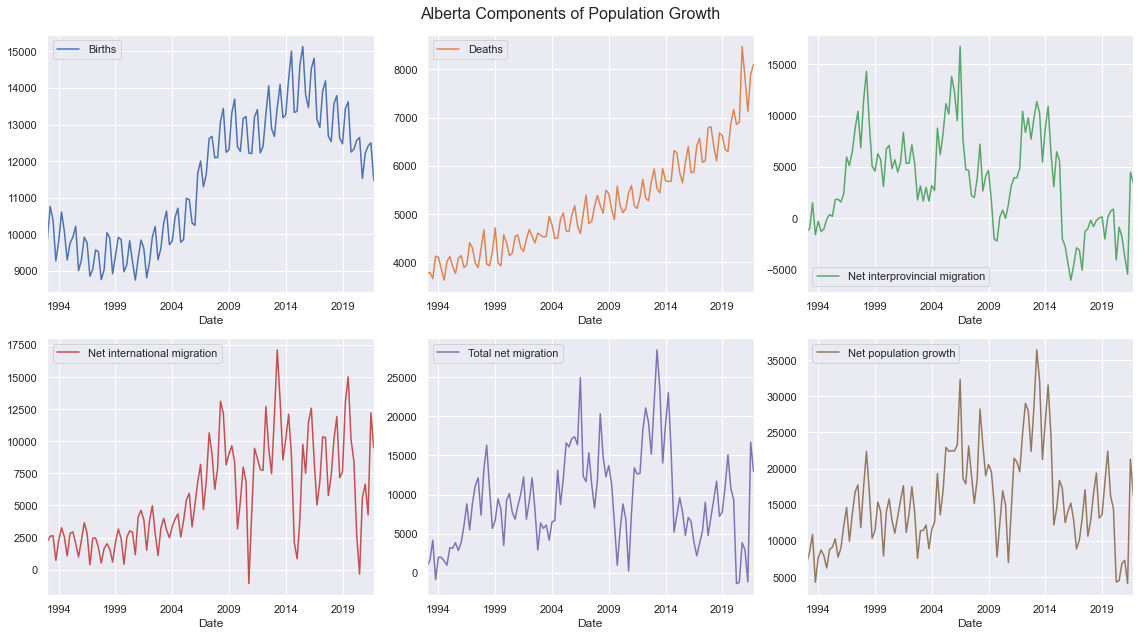

In [11]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Alberta Components of Population Growth', fontsize=16)


ab_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['1993':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('kbase_graphs/ab_migration.png')

Migration into Alberta cooled off post 2014, with multiple periods of net negative interprovincial migration, as job seekers left the province to find employment elsewhere. This has continued to an extent throughout the pandemic. However, as the economy continues to strengthen, supported by reopening and increased oil demand - interprovincial migration into Alberta, and net overall migration has flipped positive in recent quarters.

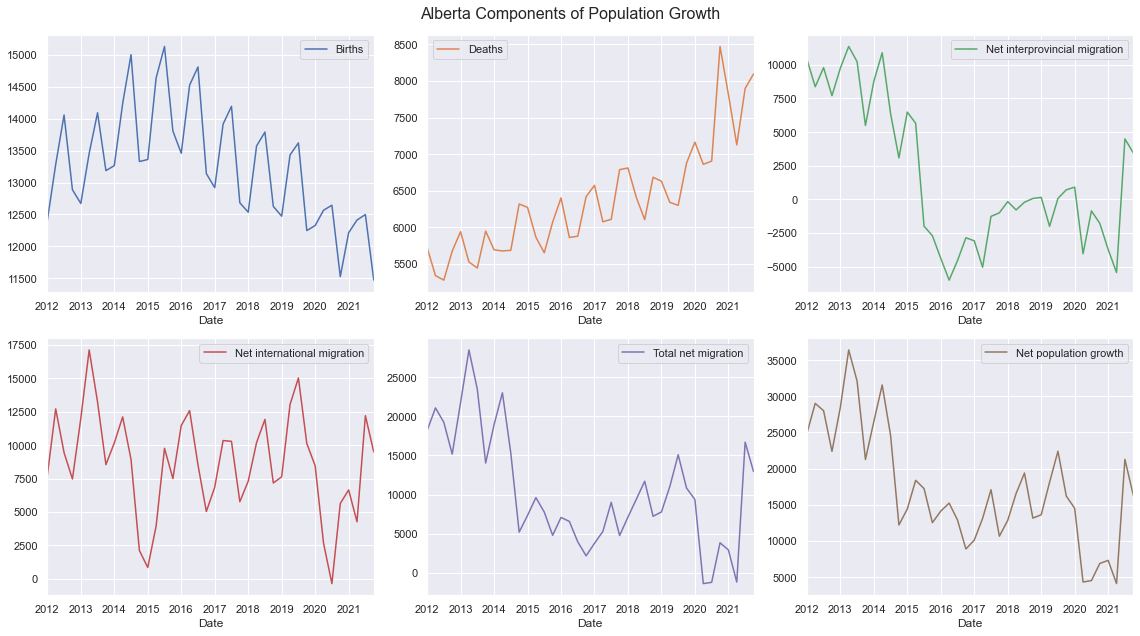

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Alberta Components of Population Growth', fontsize=16)



ab_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['2012':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('kbase_graphs/ab_pop_growth_short.png')

In [13]:
ab_pivot[['Net interprovincial migration','Net international migration','Total net migration','Net population growth']].tail(12)

Components of population growth,Net interprovincial migration,Net international migration,Total net migration,Net population growth
REF_DATE,,,,
2019-01-01,143.0,7633.0,7776.0,13621.0
2019-04-01,-2013.0,13041.0,11028.0,18122.0
2019-07-01,66.0,15016.0,15082.0,22406.0
2019-10-01,705.0,10122.0,10827.0,16198.0
2020-01-01,903.0,8453.0,9356.0,14520.0
2020-04-01,-4051.0,2673.0,-1378.0,4329.0
2020-07-01,-862.0,-352.0,-1214.0,4528.0
2020-10-01,-1790.0,5633.0,3843.0,6897.0
2021-01-01,-3732.0,6651.0,2919.0,7318.0


A closer look shows the comparison of population growth in 2020, compared to the end of 2021, where there was influx of migrants into the province.

## Calgary

In [14]:
cal_mig = sc.table_to_df('17-10-0136-01')

cal_mig=cal_mig[cal_mig['GEO']=='Calgary (CMA), Alberta']
cal_mig=cal_mig[cal_mig['Sex']=='Both sexes']
cal_mig_allage = cal_mig[cal_mig['Age group']=='All ages']
cal_mig_allage=cal_mig_allage[['REF_DATE','Components of population growth','VALUE']]

c:\Users\Maln\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
17100136-eng.zip: 100%|██████████| 110M/110M [00:43<00:00, 2.52MB/s] 


In [15]:
cal_all_pivot = cal_mig_allage.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')
cal_all_pivot['Net international migration']=cal_all_pivot['Immigrants']+cal_all_pivot['Net non-permanent residents']-cal_all_pivot['Emigrants']-cal_all_pivot['Net temporary emigration']+cal_all_pivot['Returning emigrants']

cal_all_pivot['Total net migration']=cal_all_pivot['Net interprovincial migration']+cal_all_pivot['Net international migration']

cal_all_pivot['Net population growth']=cal_all_pivot['Total net migration']+ cal_all_pivot['Births']-cal_all_pivot['Deaths']

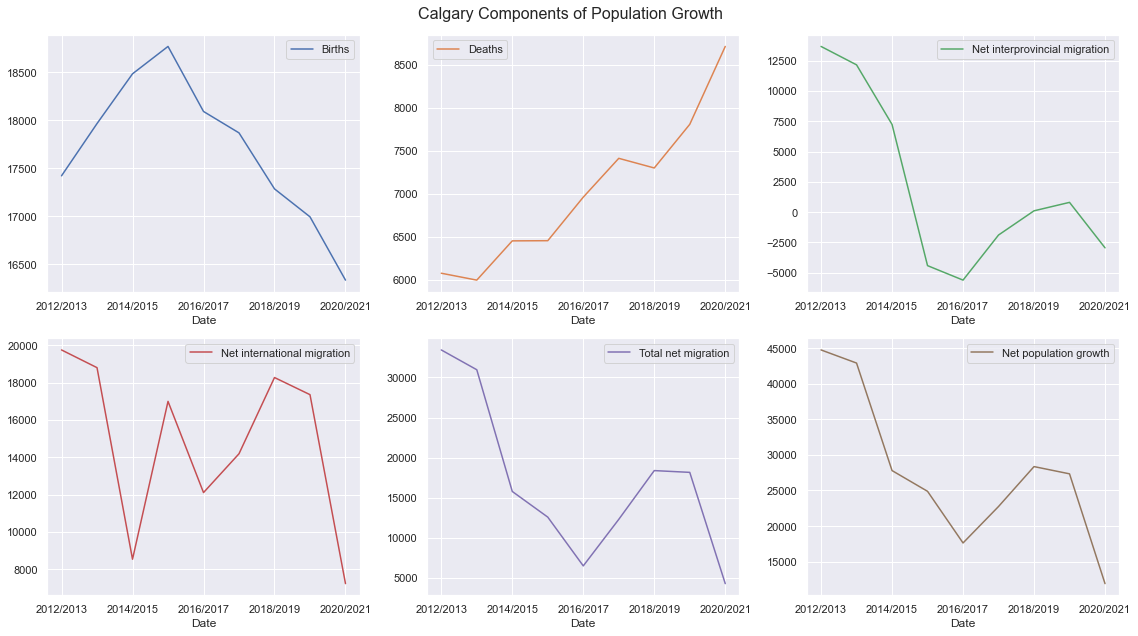

In [16]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Calgary Components of Population Growth', fontsize=16)

cal_all_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['2012/2013':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('kbase_graphs/cal_pop_growth_short.png')

While Calgary's population growth largely reflects Alberta, data is only limited to an annual figure. Expectations for 2022 should show strong net migration into the city compared to previous years.

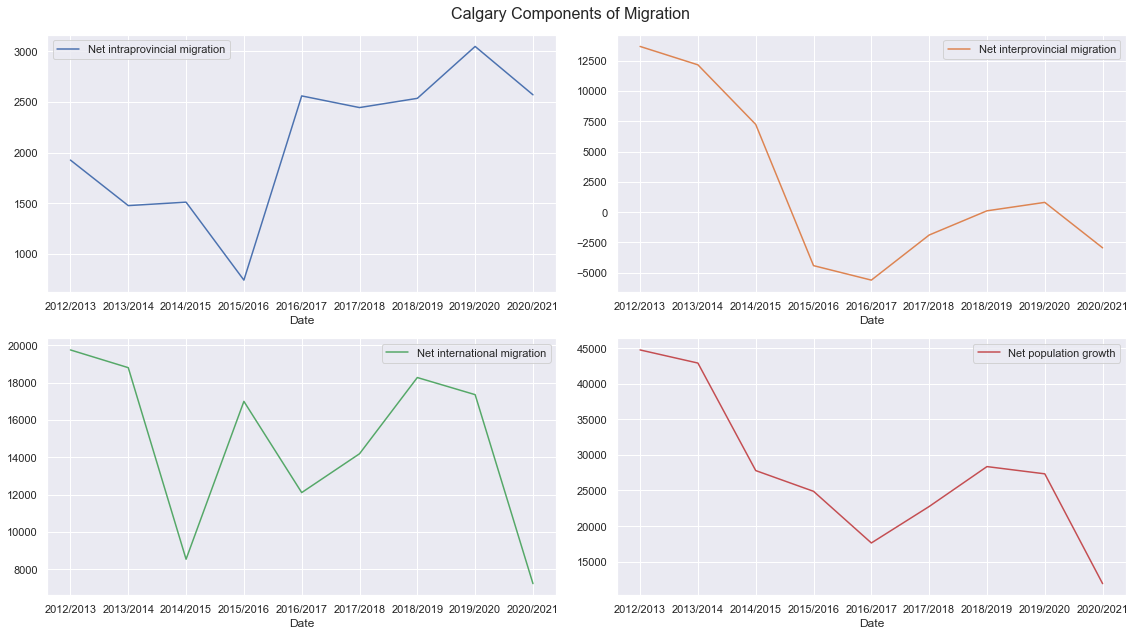

In [17]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,9))
fig.suptitle('Calgary Components of Migration', fontsize=16)

cal_all_pivot[['Net intraprovincial migration','Net interprovincial migration','Net international migration','Net population growth']]['2012/2013':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('kbase_graphs/cal_mig_short.png')

A consistent supply of people into the city of Calgary comes intraprovincial migrants, especially after smaller oil towns saw large job losses post recession. This trend will continue as Alberta continues to urbanize, where in the province move towards the Edmonton-Red Deer-Calgary corridor.

In [18]:
cal_senior = cal_mig[cal_mig['Age group']=='65 years and older'][['REF_DATE','Components of population growth','VALUE']]
cal_senior_piv=cal_senior.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

In [19]:
cal_senior_piv['Net international migration']=cal_senior_piv['Immigrants']+cal_senior_piv['Net non-permanent residents']-cal_senior_piv['Emigrants']-cal_senior_piv['Net temporary emigration']+cal_senior_piv['Returning emigrants']

cal_senior_piv['Total net migration']=cal_senior_piv['Net interprovincial migration']+cal_senior_piv['Net international migration']

cal_senior_piv['Net population growth']=cal_senior_piv['Total net migration']+cal_senior_piv['Deaths']

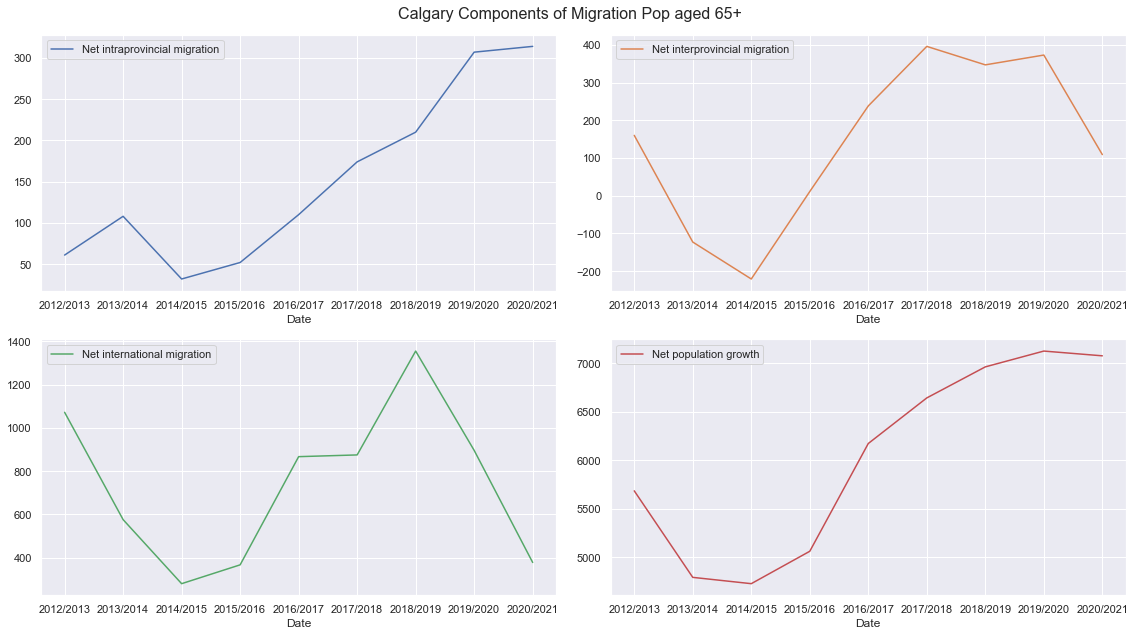

In [20]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,9))
fig.suptitle('Calgary Components of Migration Pop aged 65+', fontsize=16)

cal_senior_piv[['Net intraprovincial migration','Net interprovincial migration','Net international migration','Net population growth']]['2012/2013':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()